# MLP

## Introdução
Neste exercício computacional 3 iremos trabalhar com MLP. Vale lembrar que MLP (Multi Layer Perceptron ou Perceptron Multicamadas) é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios. A camada oculta possui esse nome porque não é possível prever a saída desejada nas camadas intermediárias.

## Execução do trabalho

1. Fazendo o import das bibliotecas:

In [1]:
import numpy as np
import random 
import math
import matplotlib.pyplot as plt

2. Rede neural, onde se utiliza a função sigmoidal como função de ativação para os neurônios da camada oculta e da camada de saída:

In [2]:
class NN:
    def __init__(self, layers, eta):
        self.W = []
        self.layers = layers
        self.eta = eta

        for i in range(0, len(layers)-2):
            w = np.random.randn(layers[i] + 1, layers[i+1] + 1)
            self.W.append(w/np.sqrt(layers[i]))
        
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w/np.sqrt(layers[-2]))
        
    def sigmoid(self, x):
        return 1.0/ (1.0 + np.exp(-x))

    def predict(self, X):
        p = np.atleast_2d(X)
        p = np.c_[p, np.ones((p.shape[0]))]
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p 

    def sigmoid_derivada(self, x):
        return x*(1-x)

    def fit_partial(self, x, y):
        A = [np.atleast_2d(x)]
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])
            out = self.sigmoid(net)
            A.append(out)
        
        error = A[-1] - y
        Delt = [error * self.sigmoid_derivada(A[-1])]
        for layer in np.arange(len(A) -2,0,-1):
            delta = Delt[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_derivada(A[layer])
            Delt.append(delta)

        Delt = Delt[::-1]
        
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.eta*A[layer].T.dot(Delt[layer])

    def fit(self, X, y, Ne):
        X = np.c_[X, np.ones((X.shape[0]))]
        for epoch in np.arange(0,Ne):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target) 

3. Números de neurônios na camada oculta para avaliar o desempenho da rede para cada caso:

In [10]:
neurons = [3,4,5,10,15,20,50,100]

## Conjunto de dados para treinamento da rede

In [11]:
x = np.zeros((4, 1000)) # Criando o vetor x
y = np.zeros((4,1000)) # Criando o vetor y
#-- 

# Intervalo de operação (x) da função a)
x[0] = [random.randrange(1,100) for i in range(len(x[1]))] 
# Intervalo de operação (x) da função b)
x[1] = [random.randrange(1,10) for i in range(len(x[1]))]
# Intervalo de operação (x) da função c)
x[2] = [random.randrange(1,10) for i in range(len(x[1]))]
# Intervalo de operação (x) da função d)
x[3] = [random.uniform(0, math.pi/2) for i in range(len(x[1]))]

# y da Função a) - Note que ele recebe o x calculado anteriormente
y[0] = np.reciprocal(x[0]) 
# y da Função b) - Note que ele recebe o x calculado anteriormente
y[1] = np.log10(x[1]) 
# y da Função c) - Note que ele recebe o x calculado anteriormente
y[2] = np.exp(-x[2])
# y da Função d) - Note que ele recebe o x calculado anteriormente
y[3] = np.sin(x[3]) 


## Conjunto de dados para teste

In [12]:
# Criando os vetores xteste e yteste
xteste = np.zeros((4,1000))
yteste = np.zeros((4,1000))

# Nota: A função linspace é uma função matemática 
# que cria um vetor de valores igualmente 
# espaçados entre dois números especificados. 

# FUNÇÃO A
# -- xteste[0] vetor com os valores igualmente espaçados do intervalo 
# referente a função a)
xteste[0] = np.linspace(1,100,1000)
# Função reciprocal calcula o inverso de um número
yteste[0] = np.reciprocal(xteste[0])
# --

# FUNÇÃO B
# -- xteste[1] vetor com os valores igualmente espaçados do intervalo 
# referente a função b)
xteste[1] = np.linspace(1,10,1000)
#Função log10 calcula o logaritmo de base 10 de um número
yteste[1] = np.log10(xteste[1])
# --

# FUNÇÃO C
# -- xteste[2] vetor com os valores igualmente espaçados do intervalo 
# referente a função c)
xteste[2] = np.linspace(1,10,1000)
# Função exp é uma função matemática que retorna 
# o valor da função exponencial de um número
yteste[2] = np.exp(-xteste[2])
# --

# FUNÇÃO D
# -- xteste[3] vetor com os valores igualmente espaçados do intervalo 
# referente a função d)
xteste[3] = np.linspace(0,math.pi/2,1000)
# Função sin é uma função trigonométrica que
# retorna o valor do seno de um ângulo dado
yteste[3]  = np.sin(xteste[3])

## Variáveis para cada caso

In [3]:
MSE1= [] # vetor erro quadrático médio - função a
# -- 

MSE2 = [] # vetor erro quadrático médio - função b
# --

MSE3=[] # vetor erro quadrático médio - função c
# --

MSE4=[] # vetor erro quadrático médio - função d
# --

MSE = [] # vetor com erro quadrático médio das funções a, b, c e d
# --

ypred1 = [] # vetor que guardará a modelagem da função ´a´ para cada número
# de neurônios da camada oculta (3, 4, 5, 10, 15, 20, 50, 100)
# --

ypred2 = [] # vetor que guardará a modelagem da função ´b´ para cada número
# de neurônios da camada oculta (3, 4, 5, 10, 15, 20, 50, 100)
# --

ypred3 = [] # vetor que guardará a modelagem da função ´c´ para cada número
# de neurônios da camada oculta (3, 4, 5, 10, 15, 20, 50, 100)
# --

ypred4 = [] # vetor que guardará a modelagem da função ´d´ para cada número
# de neurônios da camada oculta (3, 4, 5, 10, 15, 20, 50, 100)
# --

## Treinamento e teste das funções solicitadas

In [4]:
# Função 1/x 
# Inicia o treinamento com os números de neurônios da camada oculta
for neuron in neurons: 
    ypred = []
    rede = NN([1, neuron,1], 0.1)
    rede.fit(x[0], y[0], 100)
    for (xt, target) in zip(xteste[0], yteste[0]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    # erro médio quadrático
    erro = np.sum(yteste[0]-ypred)**2/len(yteste[0])
    # Adicionando ao vetor ´ypred1´ cada modelagem 
    # da função 'a' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    ypred1.append(ypred)
    # Adicionando ao vetor ´MSE1´ cada erro médio quadrático 
    # da função 'a' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    MSE1.append(erro)
MSE.append(MSE1)

In [5]:
# Função log10
# Inicia o treinamento com os números de neurônios da camada oculta
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron, 1], 0.1)
    rede.fit(x[1], y[1], 100)
    for (xt, target) in zip(xteste[1], yteste[1]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    # erro médio quadrático
    erro = np.sum(yteste[1]-ypred)**2/len(yteste[1])
    # Adicionando ao vetor ´ypred2´ cada modelagem 
    # da função 'b' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    ypred2.append(ypred)
    # Adicionando ao vetor ´MSE2´ cada erro médio quadrático 
    # da função 'b' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    MSE2.append(erro)
MSE.append(MSE2)

In [6]:
# Função exp
# Inicia o treinamento com os números de neurônios da camada oculta
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron, 1], 0.1)
    rede.fit(x[2], y[2], 100)
    for (xt, target) in zip(xteste[2], yteste[2]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    # erro médio quadrático
    erro = np.sum(yteste[2]-ypred)**2/len(yteste[2])
    # Adicionando ao vetor ´ypred3´ cada modelagem 
    # da função 'c' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    ypred3.append(ypred)
    # Adicionando ao vetor ´MSE3´ cada erro médio quadrático 
    # da função 'c' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    MSE3.append(erro)
MSE.append(MSE3)

In [7]:
# Função sen
# Inicia o treinamento com os números de neurônios da camada oculta
for neuron in neurons:
    ypred = []
    rede = NN([1, neuron], 0.1)
    rede.fit(x[3], y[3], 100)
    for (xt, target) in zip(xteste[3], yteste[3]): #Inicia o teste
        pred = rede.predict(xt)[0][0]
        ypred.append(pred)
    erro = 0
    # erro médio quadrático
    erro = np.sum(yteste[3]-ypred)**2/len(yteste[3])
    # Adicionando ao vetor ´ypred4´ cada modelagem 
    # da função 'd' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    ypred4.append(ypred)
    # Adicionando ao vetor ´MSE4´ cada erro médio quadrático 
    # da função 'c' referente ao seguinte números de neurônios:
    # (3, 4, 5, 10, 15, 20, 50, 100)
    MSE4.append(erro)
MSE.append(MSE4)

## Tabela com o erro médio quadrático

1. Nesta tabela explicitaremos o resultado do erro médio quadrático para cada função, com diferentes números de neurônios na camada oculta

In [22]:
print("\t\tFunção 1/x 1 <= x <= 100\t\t")
print("Número de neurônios \t\t Erro Quadrático médio")

# neurons> vetor com número de neurônios da camada oculta
# MSE> Erro médio quadrático obtido para função a
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[0][i]))
print("----------------------------------------------------")

# neurons> vetor com número de neurônios da camada oculta
# MSE> Erro médio quadrático obtido para função b
print("\t\tFunção log10(x) 1 <= x <= 10\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[1][i]))
print("----------------------------------------------------")

# neurons> vetor com número de neurônios da camada oculta
# MSE> Erro médio quadrático obtido para função c
print("\t\tFunção exp(-x) 1 <= x <= 10\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[2][i]))
print("----------------------------------------------------")

# neurons> vetor com número de neurônios da camada oculta
# MSE> Erro médio quadrático obtido para função d
print("\t\tFunção sen(x) 1 <= x <= pi/2\t\t")
for i in range (0,len(MSE[1])):
        print("\t%d \t\t\t\t %f" % (neurons[i], MSE[3][i]))
print("----------------------------------------------------")

		Função 1/x 1 <= x <= 100		
Número de neurônios 		 Erro Quadrático médio
	3 				 0.006695
	4 				 0.001682
	5 				 0.003235
	10 				 0.003826
	15 				 0.000023
	20 				 0.000262
	50 				 0.000711
	100 				 0.001115
----------------------------------------------------
		Função log10(x) 1 <= x <= 10		
	3 				 0.008246
	4 				 0.010333
	5 				 0.014501
	10 				 0.012229
	15 				 0.018326
	20 				 0.015600
	50 				 0.022082
	100 				 0.018794
----------------------------------------------------
		Função exp(-x) 1 <= x <= 10		
	3 				 0.023414
	4 				 0.023620
	5 				 0.022805
	10 				 0.013451
	15 				 0.013021
	20 				 0.011785
	50 				 0.009016
	100 				 0.009441
----------------------------------------------------
		Função sen(x) 1 <= x <= pi/2		
	3 				 0.006819
	4 				 0.006819
	5 				 0.006819
	10 				 0.006819
	15 				 0.006819
	20 				 0.006819
	50 				 0.006819
	100 				 0.006819
----------------------------------------------------


## Relação visual

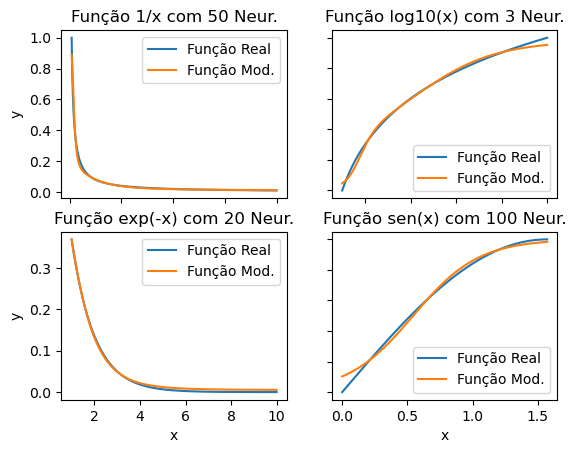

In [21]:
fig, axs = plt.subplots(2, 2)
# xteste e yteste faz referência a função real 
# xteste e ypred1 faz referência às funções modeladas
axs[0, 0].plot(xteste[0], yteste[0],xteste[0],ypred1[6])
axs[0,0].legend(labels=['Função Real', 'Função Mod.'])
axs[0, 0].set_title('Função 1/x com 50 Neur.')
axs[0, 1].plot(xteste[1], yteste[1],xteste[1],ypred2[0])
axs[0, 1].legend(labels=['Função Real', 'Função Mod.'])
axs[0, 1].set_title('Função log10(x) com 3 Neur.')
axs[1, 0].plot(xteste[2], yteste[2],xteste[2],ypred3[5])
axs[1, 0].legend(labels=['Função Real', 'Função Mod.'])
axs[1, 0].set_title('Função exp(-x) com 20 Neur.')
axs[1, 1].plot(xteste[3], yteste[3],xteste[3],ypred4[7])
axs[1, 1].legend(labels=['Função Real', 'Função Mod.'])
axs[1, 1].set_title('Função sen(x) com 100 Neur.')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()